# 와인 점수 예측하기
#### 와인의 화학성분과 색 등으로 점수를 매기는 문제입니다
## 목표 Y : 와인 점수
## 입력 X : 화학성분, 색 등등
###  Y = WX + b 의 선형함수로 데이터를 모델링하자
###  Y = w1x1 + w2x2 + ... + b

In [1]:
import numpy as np # 데이터 처리용
import tensorflow as tf # 모델 fitting 
import matplotlib.pyplot as plt # 그래프로 시각화 
import pandas as pd # 데이터 획득 및 전처리 분석

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')

In [3]:
df.isna().sum().sum()

0

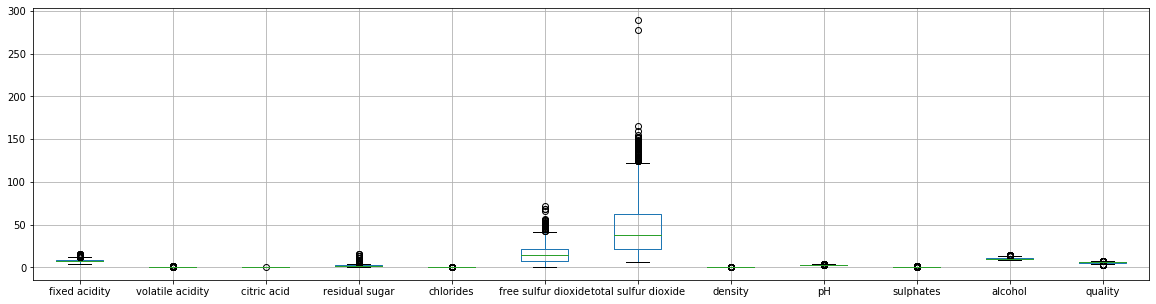

In [4]:
df.boxplot(figsize=(20,5))

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
axes = pd.plotting.scatter_matrix(df)

In [25]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [6]:
#X:알콜 도수와 색(하얀색>빨간, 0:10), Y:와인 점수
x = [[10, 0], [15, 5], [20, 10.0]]
y = [3,6,9] 
# min-max 정규화
xmin = np.min(x, axis=0)
xmax = np.max(x, axis=0)
xn = (x - xmin) / (xmax-xmin)

In [7]:
x = df.drop(columns='quality')
y = df['quality']
x = np.array(x)
y = np.array(y)

In [ ]:
#표준편차 정규화 : (x - 평균)/표준편차 , 출력값 분포 [-2, 2]
xn = (x - np.mean(x, axis=0)) / np.std(x, axis=0)
np.min(xn),np.max(xn),np.mean(xn)

In [20]:
# 다항 특성x 를 추가해보자, 데이터의 특징이 직선이 아니고 곡선으로 분포되어 있을 수 있다
from sklearn.preprocessing import PolynomialFeatures
fp = PolynomialFeatures(degree=2)
xn = fp.fit_transform(xn)
#xp.shape, fp.get_feature_names()

In [21]:
#numpy 배열.shape, tensorflow tf.shape(텐서)
xx = tf.constant(xn, dtype=tf.float32)
yy = tf.constant(y, dtype=tf.float32)
w = tf.Variable(tf.random_normal(shape=[tf.shape(xx)[-1]])) 
b = tf.Variable(tf.random_normal(shape=[1])) 
# W(w1, w2), X(x1, x2) = WX = (w1*x1 + w2*x2)
h = tf.reduce_sum(w * xx, axis=1) + b #예측
cost = tf.reduce_mean(tf.square(h - yy))
opt = tf.train.GradientDescentOptimizer(0.01)#경사하강법(cost, theta)  
train = opt.minimize(cost)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [ ]:
for i in range(2000): sess.run(train)
sess.run(cost) # 코스트가 크다, 지역최저점에서 수렴했다 

In [ ]:
#정확도, True의 비율(예측==정답) 
np.mean(np.round(sess.run(h)) == y)

In [ ]:
# 1점 차이는 허용 
np.mean(np.logical_and(sess.run(h) > y-1, sess.run(h) < y+1))

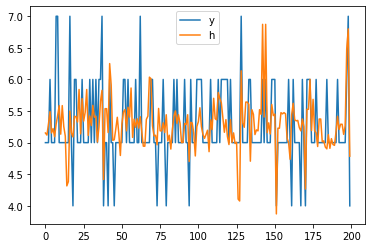

In [33]:
m = 200
plt.plot(y[:m], label='y')
plt.plot(sess.run(h[:m]), label='h')
plt.legend()

발산할때 해결방법
1. X, Y 가 상관이 있는가
1. 학습률을 낮춘다. 
1. X, Y 데이터를 정규화한다  
1. 파라미터(W) 초기값을 조절해본다
1. 데이터를 수정한다
1. 모델을 다시만든다